In [11]:
import sys 
sys.path.append('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/')
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import matplotlib
import Hyperparam_Testing.Testing_Notebooks.Common_Functions as cf 
from sklearn.model_selection import train_test_split as tts
import datetime
matplotlib.rcParams.update({'legend.fontsize': 16})
matplotlib.rcParams.update({'font.size': 16})


# Maths For Repopulating Array 
given that  \
$P(x>cutoff) = F$  \
$P(x<cutoff) = 1-F$  \
$n_{d}$ is both number of input fields and the number of desired fields.  \
$n_{gi}$ is number of inital fields which satisfy $(x>cutoff)$.  \
$n_{tg}$ is the total number of fields to generate.  \
$n_{gf}$ is number of fields generated in the second instance, which satisfy $(x>cutoff)$.   \
points required with buffer (b):  \
$n_{tg} = b \cdot \frac{n_{d}}{F}$  \
$n_{tg} = n_{gi} + n_{gf}$  \
$n_{gi} = n_d \cdot F$     \
$n_{gf} = n_d\cdot \frac{b-F^2}{F}$

In [16]:
time = datetime.datetime.now()
time_string = time.strftime('%d_%m_%y')


'20_02_22'

In [2]:

sigma = 0.03
data = cf.noisy(sigma).data(10**5,cutoff = 0.1)

Training data cut for potential values below 0.1
Remaining data fraction after cut  = 0.58188
To retain 100000 training points generating 72755 more 
This produces 100522 usefull points


In [3]:
x,y = data[:,:16],data[:,16]
train_x, val_x, train_y, val_y =  tts(x,y,test_size = 0.1)

In [4]:
#Clear Session 
tf.keras.backend.clear_session()  

opt = keras.optimizers.Adam(beta_1= 0.9, beta_2= 0.98)
#Build Model 
model = models.Sequential()
model.add(layers.Input(train_x.shape[1]))
model.add(layers.Dense(300,activation= 'relu',))
model.add(layers.Dense(300,activation= 'relu',))
model.add(layers.Dense(300,activation= 'relu',))
model.add(layers.Dense(300,activation= 'relu',))
model.add(layers.Dense(300,activation= 'relu',))
model.add(layers.Dense(1))
model.compile(optimizer = opt,loss = 'mape', metrics = [['mean_absolute_error'],['mean_absolute_percentage_error']])
model.summary()

2022-02-20 14:01:36.696899: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-20 14:01:36.701263: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-20 14:01:36.701492: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               5100      
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 301       
Total params: 366,601
Trainable params: 366,601
Non-trainable params: 0
__________________________________________________

2022-02-20 14:01:36.702282: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-20 14:01:36.703086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-20 14:01:36.703443: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-20 14:01:36.703647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [5]:
epoch_num = 100


In [6]:

history = model.fit(train_x,train_y,validation_data=(val_x,val_y),batch_size= 32 , epochs = epoch_num)

2022-02-20 14:01:37.098094: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
2813/2813 [==============================] - 5s 1ms/step - loss: 18.8336 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 18.8336 - val_loss: 15.9873 - val_mean_absolute_error: 0.0344 - val_mean_absolute_percentage_error: 15.9873
Epoch 2/100
2813/2813 [==============================] - 4s 1ms/step - loss: 15.0657 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 15.0657 - val_loss: 13.4154 - val_mean_absolute_error: 0.0263 - val_mean_absolute_percentage_error: 13.4154
Epoch 3/100
2813/2813 [==============================] - 4s 1ms/step - loss: 14.1501 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 14.1501 - val_loss: 16.0848 - val_mean_absolute_error: 0.0320 - val_mean_absolute_percentage_error: 16.0848
Epoch 4/100
2813/2813 [==============================] - 4s 1ms/step - loss: 13.8567 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 13.8567 - val_loss: 14.3506 - val_mean_absolute_error: 0.0292 - val_mean_absolut

In [21]:
#history = model.history
model.save('./5_10{}datapoints_noise_{}.h5'.format((np.log10(train_y.shape[0]+val_y.shape[0])),sigma))
model = tf.keras.models.load_model('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Hyperparam_Testing/Testing_Notebooks/Optimised_Network/103.0datapoints_noise_0.03_cutoff_0.1_date20_02_22.h5')
pred_y = model.predict(x)
mape = np.mean(abs((pred_y[:,0]-y)/y))

In [22]:
print(mape)

0.16960337971241365


In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']
## Save these 
np.savetxt('./loss_for_window.csv',loss)
np.savetxt('./val_loss_for_window.csv',val_loss)

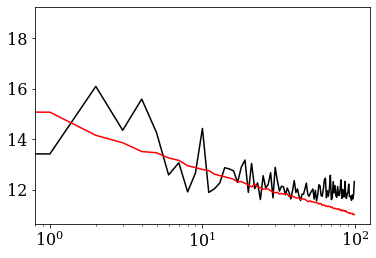

In [9]:
plt.semilogx(range(epoch_num),val_loss,c = 'black',label = 'val_Loss')
plt.semilogx(range(epoch_num),loss,c = 'red',label = 'Loss')

In [10]:
new_test_data = gen_and_load_noisy(10**5,0,sigma,cutoff = 0.1)
test_x,test_y = new_test_data[1]

NameError: name 'gen_and_load_noisy' is not defined

In [ ]:
pred_y = model.predict(test_x)[:,0]
mape = np.mean(abs((test_y-pred_y)/pred_y))
print('Test MAPE with sigma {} is: {}'.format(sigma,mape*100))

Test MAPE with sigma 0.04 is: 15.883269009724843


Huge Mape improvement with the noisy data using a cutoff, it really performs extra well